### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### importing datasets

In [2]:
nifty_50_symbols = [
    "ADANIENT.NS", "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS",
    "BAJFINANCE.NS", "BAJAJFINSV.NS", "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS",
    "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS",
    "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HEROMOTOCO.NS",
    "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "ITC.NS", "INDUSINDBK.NS",
    "INFY.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
    "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS",
    "POWERGRID.NS", "RELIANCE.NS", "SBIN.NS", "SUNPHARMA.NS",
    "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS",
    "TITAN.NS", "UPL.NS", "ULTRACEMCO.NS", "WIPRO.NS", "HINDPETRO.NS"
]


In [ ]:
start_date = "2010-01-01"
end_date = "2013-01-01"

trading_data = {}
trading_data = {}

for symbol in nifty_50_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'Close']]
    df.dropna(inplace=True)
    trading_data[symbol] = df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### feature generation

In [ ]:
symbol = "ADANIENT.NS"
df = pd.DataFrame(columns=[f"col_{i}" for i in range(93)])
y_arr = []

for t in range(241, len(trading_data[symbol])):
    t_arr = []
    
    # ---- First lag set: m in {1, 2, ..., 20}
    for m in range(1, 21):
        ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
        cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
        or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
        
        t_arr.extend([ir_t_m, cr_t_m, or_t_m])  # ✅ use extend for cleaner code

    # ---- Second lag set: m in {40, 60, ..., 240}
    for m in range(40, 241, 20):
        ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
        cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
        or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
        
        t_arr.extend([ir_t_m, cr_t_m, or_t_m])

    # ✅ Now append only clean float values
    df.loc[len(df)] = t_arr
    
    # ✅ Compute the target as a float
    target = float(trading_data[symbol]["Close"].iloc[t] / trading_data[symbol]["Open"].iloc[t] - 1)
    y_arr.append(target)

# ✅ Assign final target column
df["target"] = y_arr


In [5]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,target
0,0.007745,0.002086,-0.006885,-0.025715,-0.013739,-0.004814,-0.000316,-0.016998,-0.020529,-0.022538,...,0.017980,0.276843,0.244146,0.035213,0.352193,0.288511,0.019978,0.397855,0.356834,0.007255
1,0.007255,0.000320,0.006803,0.007745,0.002407,0.007125,-0.025715,-0.013423,0.009226,-0.000316,...,-0.004724,0.253172,0.257455,-0.003125,0.297859,0.328672,0.096436,0.366678,0.252377,-0.006677
2,-0.006677,0.000080,-0.002321,0.007255,0.000400,-0.002241,0.007745,0.002487,-0.001922,-0.025715,...,-0.001089,0.249059,0.248258,0.015000,0.319800,0.349450,-0.062957,0.244015,0.294552,-0.006337
3,-0.006337,-0.008643,-0.011947,-0.006677,-0.008564,-0.020487,0.007255,-0.008246,-0.020408,0.007745,...,-0.037129,0.240348,0.272157,0.026196,0.340899,0.310425,0.006227,0.286349,0.255121,0.011029
4,0.011029,-0.001049,0.001616,-0.006337,-0.009683,0.000565,-0.006677,-0.009604,-0.008083,0.007255,...,0.049420,0.286188,0.319890,0.014193,0.324879,0.308449,0.015486,0.268964,0.248719,-0.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.018695,0.007195,0.003847,-0.073821,-0.064279,0.011070,0.034214,-0.034318,-0.060679,0.000354,...,0.004961,-0.230705,-0.242171,0.054513,-0.280772,-0.317152,-0.014846,-0.036416,-0.016121,0.002372
496,0.002372,0.006228,0.001274,-0.018695,0.013469,0.007511,-0.073821,-0.058450,0.014760,0.034214,...,-0.022267,-0.240373,-0.222602,0.051205,-0.315532,-0.346629,-0.009138,-0.013787,-0.008063,-0.008000
497,-0.008000,-0.006736,-0.000366,0.002372,-0.000549,-0.007100,-0.018695,0.006642,-0.000916,-0.073821,...,-0.042818,-0.228821,-0.199748,-0.029013,-0.351856,-0.342753,-0.032017,-0.015999,0.016175,-0.008617
498,-0.008617,-0.008981,0.005178,-0.008000,-0.015656,-0.003849,0.002372,-0.009525,-0.010559,-0.018695,...,-0.000279,-0.206644,-0.215201,-0.006278,-0.348417,-0.340905,-0.032597,0.007418,0.054528,0.001472


### preparing training data

In [ ]:

df = pd.DataFrame(columns=[f"col_{i}" for i in range(93)])
y_arr = []
for symbol in nifty_50_symbols:
    for t in range(241, len(trading_data[symbol])):
        t_arr = []
        
        # ---- First lag set: m in {1, 2, ..., 20}
        for m in range(1, 21):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])  # ✅ use extend for cleaner code

        # ---- Second lag set: m in {40, 60, ..., 240}
        for m in range(40, 241, 20):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])

        # ✅ Now append only clean float values
        df.loc[len(df)] = t_arr
        
        # ✅ Compute the target as a float
        target = float(trading_data[symbol]["Close"].iloc[t] / trading_data[symbol]["Open"].iloc[t] - 1)
        y_arr.append(target)

    print(f"Processed symbol: {symbol}")

# ✅ Assign final target column
df["target"] = y_arr


Processed symbol: ADANIENT.NS
Processed symbol: ADANIPORTS.NS
Processed symbol: ASIANPAINT.NS
Processed symbol: AXISBANK.NS
Processed symbol: BAJAJ-AUTO.NS
Processed symbol: BAJFINANCE.NS
Processed symbol: BAJAJFINSV.NS
Processed symbol: BPCL.NS
Processed symbol: BHARTIARTL.NS
Processed symbol: BRITANNIA.NS
Processed symbol: CIPLA.NS
Processed symbol: COALINDIA.NS
Processed symbol: DIVISLAB.NS
Processed symbol: DRREDDY.NS
Processed symbol: EICHERMOT.NS
Processed symbol: GRASIM.NS
Processed symbol: HCLTECH.NS
Processed symbol: HDFCBANK.NS
Processed symbol: HEROMOTOCO.NS
Processed symbol: HINDALCO.NS
Processed symbol: HINDUNILVR.NS
Processed symbol: ICICIBANK.NS
Processed symbol: ITC.NS
Processed symbol: INDUSINDBK.NS
Processed symbol: INFY.NS
Processed symbol: JSWSTEEL.NS
Processed symbol: KOTAKBANK.NS
Processed symbol: LT.NS
Processed symbol: M&M.NS
Processed symbol: MARUTI.NS
Processed symbol: NESTLEIND.NS
Processed symbol: NTPC.NS
Processed symbol: ONGC.NS
Processed symbol: POWERGRID

In [7]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,target
0,0.007745,0.002086,-6.884960e-03,-0.025715,-0.013739,-0.004814,-0.000316,-0.016998,-0.020529,-0.022538,...,0.017980,0.276843,0.244146,0.035213,0.352193,0.288511,0.019978,0.397855,0.356834,0.007255
1,0.007255,0.000320,6.802811e-03,0.007745,0.002407,0.007125,-0.025715,-0.013423,0.009226,-0.000316,...,-0.004724,0.253172,0.257455,-0.003125,0.297859,0.328672,0.096436,0.366678,0.252377,-0.006677
2,-0.006677,0.000080,-2.320947e-03,0.007255,0.000400,-0.002241,0.007745,0.002487,-0.001922,-0.025715,...,-0.001089,0.249059,0.248258,0.015000,0.319800,0.349450,-0.062957,0.244015,0.294552,-0.006337
3,-0.006337,-0.008643,-1.194679e-02,-0.006677,-0.008564,-0.020487,0.007255,-0.008246,-0.020408,0.007745,...,-0.037129,0.240348,0.272157,0.026196,0.340899,0.310425,0.006227,0.286349,0.255121,0.011029
4,0.011029,-0.001049,1.616003e-03,-0.006337,-0.009683,0.000565,-0.006677,-0.009604,-0.008083,0.007255,...,0.049420,0.286188,0.319890,0.014193,0.324879,0.308449,0.015486,0.268964,0.248719,-0.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,-0.010997,-0.013272,-2.690188e-03,-0.003351,-0.017445,-0.015926,0.013393,-0.004285,-0.020088,-0.005858,...,0.041514,-0.044484,-0.088381,0.035251,0.009526,-0.031395,-0.001185,0.133247,0.130869,0.008452
23286,0.008452,0.005739,-1.022761e-07,-0.010997,-0.007609,0.005739,-0.003351,-0.011806,-0.007609,0.013393,...,-0.017694,-0.080676,-0.072693,-0.023228,-0.023209,0.000868,0.010800,0.140427,0.140878,0.000178
23287,0.000178,0.000178,1.951534e-07,0.008452,0.005918,0.000178,-0.010997,-0.007432,0.005918,-0.003351,...,-0.011380,-0.072527,-0.065009,-0.017644,0.001046,0.015501,-0.004441,0.141082,0.169308,0.002496
23288,0.002496,0.002496,3.023318e-03,0.000178,0.002675,0.005527,0.008452,0.008429,0.005706,-0.010997,...,-0.024676,-0.062675,-0.059536,0.001573,0.018035,0.012201,-0.021837,0.172226,0.209869,0.039184


In [8]:
df.to_csv("training_data.csv", index=False)

### MAKING THE RANDOM FOREST MODEL

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Extract features (X) and target (y)
X_train = df.drop(columns=["target"])
y_train = df["target"]

# Compute max_features = ⌊sqrt(p)⌋ where p = number of features
p = X_train.shape[1]
max_features = int(np.sqrt(p))

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    max_features=max_features,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=9, n_estimators=1000,
                      n_jobs=-1, random_state=42)

In [11]:
import joblib
# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

### PREPARING THE TRADING DATA

In [28]:
start_date = "2010-01-01"
end_date = "2014-01-01"
trading_data = {}

for symbol in nifty_50_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'Close']]
    df.dropna(inplace=True)
    trading_data[symbol] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [33]:
len(trading_data["COALINDIA.NS"])

778

#### removing coalindia from the list because data is not sufficient

In [34]:
nifty_50_symbols.remove("COALINDIA.NS")


In [35]:
nifty_50_symbols

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS',
 'HINDPETRO.NS']

In [37]:
df_list = []
for symbol in nifty_50_symbols:
    df = pd.DataFrame(columns=[f"col_{i}" for i in range(93)])
    y_arr = []

    for t in range(741, len(trading_data[symbol])):
        t_arr = []
        
        # ---- First lag set: m in {1, 2, ..., 20}
        for m in range(1, 21):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])  # ✅ use extend for cleaner code

        # ---- Second lag set: m in {40, 60, ..., 240}
        for m in range(40, 241, 20):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])

        # ✅ Now append only clean float values
        df.loc[len(df)] = t_arr
        
        # ✅ Compute the target as a float
        target = float(trading_data[symbol]["Close"].iloc[t] / trading_data[symbol]["Open"].iloc[t] - 1)
        y_arr.append(target)

    # ✅ Assign final target column
    df["target"] = y_arr
    df_list.append(df)
    print(f"Processed symbol: {symbol}")

Processed symbol: ADANIENT.NS
Processed symbol: ADANIPORTS.NS
Processed symbol: ASIANPAINT.NS
Processed symbol: AXISBANK.NS
Processed symbol: BAJAJ-AUTO.NS
Processed symbol: BAJFINANCE.NS
Processed symbol: BAJAJFINSV.NS
Processed symbol: BPCL.NS
Processed symbol: BHARTIARTL.NS
Processed symbol: BRITANNIA.NS
Processed symbol: CIPLA.NS
Processed symbol: DIVISLAB.NS
Processed symbol: DRREDDY.NS
Processed symbol: EICHERMOT.NS
Processed symbol: GRASIM.NS
Processed symbol: HCLTECH.NS
Processed symbol: HDFCBANK.NS
Processed symbol: HEROMOTOCO.NS
Processed symbol: HINDALCO.NS
Processed symbol: HINDUNILVR.NS
Processed symbol: ICICIBANK.NS
Processed symbol: ITC.NS
Processed symbol: INDUSINDBK.NS
Processed symbol: INFY.NS
Processed symbol: JSWSTEEL.NS
Processed symbol: KOTAKBANK.NS
Processed symbol: LT.NS
Processed symbol: M&M.NS
Processed symbol: MARUTI.NS
Processed symbol: NESTLEIND.NS
Processed symbol: NTPC.NS
Processed symbol: ONGC.NS
Processed symbol: POWERGRID.NS
Processed symbol: RELIANCE.

In [38]:
joblib.dump(df_list, 'trading_data_list.pkl')


['trading_data_list.pkl']

In [43]:
len(df_list)

46

In [59]:
for i in range(len(df_list)):
    print(f"DataFrame {i} shape: {len(df_list[i])}")   

DataFrame 0 shape: 248
DataFrame 1 shape: 248
DataFrame 2 shape: 248
DataFrame 3 shape: 248
DataFrame 4 shape: 248
DataFrame 5 shape: 248
DataFrame 6 shape: 248
DataFrame 7 shape: 248
DataFrame 8 shape: 248
DataFrame 9 shape: 248
DataFrame 10 shape: 248
DataFrame 11 shape: 248
DataFrame 12 shape: 248
DataFrame 13 shape: 248
DataFrame 14 shape: 248
DataFrame 15 shape: 249
DataFrame 16 shape: 248
DataFrame 17 shape: 248
DataFrame 18 shape: 248
DataFrame 19 shape: 248
DataFrame 20 shape: 248
DataFrame 21 shape: 248
DataFrame 22 shape: 248
DataFrame 23 shape: 248
DataFrame 24 shape: 248
DataFrame 25 shape: 248
DataFrame 26 shape: 248
DataFrame 27 shape: 248
DataFrame 28 shape: 248
DataFrame 29 shape: 248
DataFrame 30 shape: 248
DataFrame 31 shape: 248
DataFrame 32 shape: 248
DataFrame 33 shape: 248
DataFrame 34 shape: 248
DataFrame 35 shape: 248
DataFrame 36 shape: 248
DataFrame 37 shape: 248
DataFrame 38 shape: 248
DataFrame 39 shape: 248
DataFrame 40 shape: 248
DataFrame 41 shape: 248
Da

## TRADING IDEA

#### Idea is:
####  1. to compute the intraday return of each of the 47 stocks in nifty 50 index for each trading day (d).
####  2. find the top 10 and bottom 10 companies on the basis of IR returns.
####  3. The stocks in top 10 are LONGED and the stocks in bottom 10 are SHORTED.
####  4. All long short positions are equally weighted ( same proportion of capital is used for each stock)

In [ ]:
# day_intraday_return_list = []
# for i in range(len(df_list)):
#         input_row = df_list[i].drop(columns=["target"]).iloc[0:1]  # shape (1, 93)
#         predicted_value = rf_model.predict(input_row)
#         day_intraday_return_list.append(predicted_value[0])  # Append the predicted value
# arr = np.array(day_intraday_return_list)
# # Get indices of top 10 values
# top_10_indices = arr.argsort()[-10:][::-1]  # last 10, reversed for descending
# # Get indices of bottom 10 values
# bottom_10_indices = arr.argsort()[:10]  # first 10 for smallest values
# top_10_indices, bottom_10_indices
# # Get the corresponding symbols
# top_10_symbols = [nifty_50_symbols[i] for i in top_10_indices]
# bottom_10_symbols = [nifty_50_symbols[i] for i in bottom_10_indices]
# print( "Long positions (top 10):", top_10_symbols)
# print("Short positions (bottom 10):", bottom_10_symbols)
# for i in range(10):
#     print(f"Top {i+1} symbol: {nifty_50_symbols[top_10_indices[i]]}, Predicted Return: {arr[top_10_indices[i]]:.4f}")
#     print(f"Bottom {i+1} symbol: {nifty_50_symbols[bottom_10_indices[i]]}, Predicted Return: {arr[bottom_10_indices[i]] :.4f}")

Long positions (top 10): ['HINDPETRO.NS', 'BRITANNIA.NS', 'TITAN.NS', 'DRREDDY.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'NESTLEIND.NS', 'INFY.NS', 'NTPC.NS', 'HEROMOTOCO.NS']
Short positions (bottom 10): ['EICHERMOT.NS', 'DIVISLAB.NS', 'ADANIENT.NS', 'BAJAJFINSV.NS', 'ADANIPORTS.NS', 'TATAMOTORS.NS', 'INDUSINDBK.NS', 'AXISBANK.NS', 'TATASTEEL.NS', 'TCS.NS']
Top 1 symbol: HINDPETRO.NS, Predicted Return: -0.0003
Bottom 1 symbol: EICHERMOT.NS, Predicted Return: -0.0020
Top 2 symbol: BRITANNIA.NS, Predicted Return: -0.0004
Bottom 2 symbol: DIVISLAB.NS, Predicted Return: -0.0017
Top 3 symbol: TITAN.NS, Predicted Return: -0.0004
Bottom 3 symbol: ADANIENT.NS, Predicted Return: -0.0017
Top 4 symbol: DRREDDY.NS, Predicted Return: -0.0004
Bottom 4 symbol: BAJAJFINSV.NS, Predicted Return: -0.0016
Top 5 symbol: ASIANPAINT.NS, Predicted Return: -0.0005
Bottom 5 symbol: ADANIPORTS.NS, Predicted Return: -0.0016
Top 6 symbol: HCLTECH.NS, Predicted Return: -0.0005
Bottom 6 symbol: TATAMOTORS.NS, Predicted R

#### 10 trading days example

In [63]:
for day_no in range(10):
    day_no = day_no+1
    day_intraday_return_list = []
    for i in range(len(df_list)):
        input_row = df_list[i].drop(columns=["target"]).iloc[day_no-1:day_no]  # shape (1, 93)
        predicted_value = rf_model.predict(input_row)
        day_intraday_return_list.append(predicted_value[0])  # Append the predicted value

    arr = np.array(day_intraday_return_list)
    # Get indices of top 10 values
    top_10_indices = arr.argsort()[-10:][::-1]  # last 10, reversed for descending
    # Get indices of bottom 10 values
    bottom_10_indices = arr.argsort()[:10]  # first 10 for smallest values
    top_10_indices, bottom_10_indices
    # Get the corresponding symbols
    top_10_symbols = [nifty_50_symbols[i] for i in top_10_indices]
    bottom_10_symbols = [nifty_50_symbols[i] for i in bottom_10_indices]
    top_actual_ir_return = []
    bottom_actual_ir_return = []
    for t in top_10_indices:
        top_actual_ir_return.append(df_list[t]["target"].iloc[day_no-1] )
    for t in bottom_10_indices:
        bottom_actual_ir_return.append(df_list[t]["target"].iloc[day_no-1] )     
    print(f"for trading day {day_no} of 248")
    print( "Long positions (top 10):", top_10_symbols)
    print("Actuals for long opsitions (top 10):", top_actual_ir_return)
    print("Short positions (bottom 10):", bottom_10_symbols)
    print("Actuals for short opsitions (bottom 10):", bottom_actual_ir_return)
    print("################################################################################################")

for trading day 1 of 248
Long positions (top 10): ['HINDPETRO.NS', 'BRITANNIA.NS', 'TITAN.NS', 'DRREDDY.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'NESTLEIND.NS', 'INFY.NS', 'NTPC.NS', 'HEROMOTOCO.NS']
Actuals for long opsitions (top 10): [np.float64(-0.0036100239272425227), np.float64(0.0028002677513778718), np.float64(0.0066666452508223895), np.float64(0.0022657418532181506), np.float64(-0.004938149210840903), np.float64(-0.011503454107980815), np.float64(-0.009878029156399792), np.float64(-0.008055507481237956), np.float64(-0.008922919716479405), np.float64(-0.004198703704047735)]
Short positions (bottom 10): ['EICHERMOT.NS', 'DIVISLAB.NS', 'ADANIENT.NS', 'BAJAJFINSV.NS', 'ADANIPORTS.NS', 'TATAMOTORS.NS', 'INDUSINDBK.NS', 'AXISBANK.NS', 'TATASTEEL.NS', 'TCS.NS']
Actuals for short opsitions (bottom 10): [np.float64(0.005659495606365361), np.float64(-0.014580529385374574), np.float64(0.009513414297541045), np.float64(0.0020885127188026154), np.float64(0.011376169187213403), np.float64(0.0023

### BACKTESTING STRATEGY AND PERFORMANCE ANALYSIS

In [80]:
intial_fund = 10000000
portfolio_size = intial_fund
portfolio_list = []


In [81]:
for day_no in range(248):
    investment_per_stock = portfolio_size / 20
    day_no = day_no+1
    day_intraday_return_list = []
    for i in range(len(df_list)):
        input_row = df_list[i].drop(columns=["target"]).iloc[day_no-1:day_no]  # shape (1, 93)
        predicted_value = rf_model.predict(input_row)
        day_intraday_return_list.append(predicted_value[0])  # Append the predicted value

    arr = np.array(day_intraday_return_list)
    # Get indices of top 10 values
    top_10_indices = arr.argsort()[-10:][::-1]  # last 10, reversed for descending
    # Get indices of bottom 10 values
    bottom_10_indices = arr.argsort()[:10]  # first 10 for smallest values
    portfolio_size = 0
    for i in range(10):
        portfolio_size += investment_per_stock * (1 + df_list[top_10_indices[i]]["target"].iloc[day_no-1])
        portfolio_size += investment_per_stock * (1 - df_list[bottom_10_indices[i]]["target"].iloc[day_no-1])

    portfolio_list.append(portfolio_size)
    print(f"Portfolio value after day {day_no}: {portfolio_size:.2f}")    

    

Portfolio value after day 1: 9964535.61
Portfolio value after day 2: 9981758.87
Portfolio value after day 3: 10011103.86
Portfolio value after day 4: 10091629.45
Portfolio value after day 5: 10059749.68
Portfolio value after day 6: 10083006.92
Portfolio value after day 7: 10112149.64
Portfolio value after day 8: 10131974.55
Portfolio value after day 9: 10055250.55
Portfolio value after day 10: 10097887.03
Portfolio value after day 11: 10209858.18
Portfolio value after day 12: 10240477.57
Portfolio value after day 13: 10246329.40
Portfolio value after day 14: 10232619.31
Portfolio value after day 15: 10285400.55
Portfolio value after day 16: 10256467.31
Portfolio value after day 17: 10389503.76
Portfolio value after day 18: 10526095.77
Portfolio value after day 19: 10562508.99
Portfolio value after day 20: 10667278.36
Portfolio value after day 21: 10654363.76
Portfolio value after day 22: 10638777.71
Portfolio value after day 23: 10573648.00
Portfolio value after day 24: 10679504.82
Por

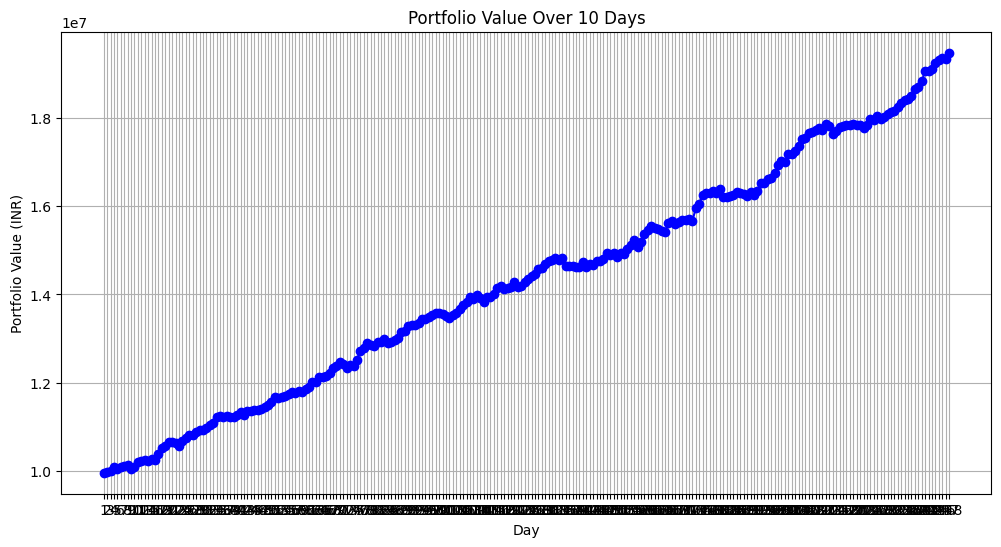

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 249), portfolio_list, marker='o', linestyle='-', color='blue')
plt.title('Portfolio Value Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(range(1, 249))
plt.grid()
plt.show()

In [84]:
# Convert to numpy array
portfolio_values = np.array(portfolio_list)

# 1. Daily Returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# 2. Cumulative Return (Total % return)
cumulative_return = (portfolio_values[-1] / portfolio_values[0]) - 1

# 3. Sharpe Ratio (Assuming risk-free rate = 0 and 252 trading days/year)
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)

# 4. Max Drawdown
running_max = np.maximum.accumulate(portfolio_values)
drawdown = (portfolio_values - running_max) / running_max
max_drawdown = drawdown.min()  # this will be negative

# 5. Count of Profit vs Loss Days
profit_days = np.sum(daily_returns > 0)
loss_days = np.sum(daily_returns < 0)

# === Print the results ===
print(f"Total Return: {cumulative_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown*100:.2f}%")
print(f"Profitable Days: {profit_days}, Loss Days: {loss_days}")


Total Return: 95.38%
Sharpe Ratio: 8.8875
Max Drawdown: -1.38%
Profitable Days: 177, Loss Days: 70


In [85]:
import pickle
with open("2013-14_daily_portfolio.pkl", "wb") as f:
    pickle.dump(portfolio_list, f)

## IN THE ABOVE CODE THE TRAINING DATA WAS OF 3 YEARS.
## THE TRADING DATA WAS  OF THE NEXT CONSECUTIVE YEAR AFTER THE 3RD 
## THE RESULTS SHOWN ABOVE ARE ONLY FOR 1 YEAR ( 2013-14)